In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from adjustText import adjust_text
from ampligraph.discovery import find_clusters
import pandas as pd
import numpy as np

In [2]:
#  Retrieve triples array 

%store -r triples_arr
X = triples_arr
print(len(X))

29759


In [3]:
triples_df = pd.DataFrame(X, columns=['s', 'p', 'o'])

#  Sanity check 
pd.set_option('max_colwidth', 100)
triples_df

,s,p,o
0,https://data.cooperationdatabank.org/vocab/class/SequentialityVariable,http://www.w3.org/2000/01/rdf-schema#subClassOf,https://data.cooperationdatabank.org/vocab/class/IndependentVariable
1,https://data.cooperationdatabank.org/vocab/prop/sequentiality_H1,https://data.cooperationdatabank.org/vocab/prop/hasPositiveEffectOn,https://data.cooperationdatabank.org/id/dependentvariable/contributions
2,https://data.cooperationdatabank.org/id/ENG00008_1.4.1,https://data.cooperationdatabank.org/vocab/prop/sequentiality,https://data.cooperationdatabank.org/id/sequentiality/simultaneous
3,https://data.cooperationdatabank.org/id/ENG00008_1.4.1.2.d,https://data.cooperationdatabank.org/vocab/prop/ESType,https://data.cooperationdatabank.org/vocab/class/LargeMediumPositiveES
4,https://data.cooperationdatabank.org/id/ENG00008_1.4.1.2.d,https://data.cooperationdatabank.org/vocab/prop/dependentVariable,https://data.cooperationdatabank.org/id/dependentvariable/contributions
...,...,...,...
29754,https://data.cooperationdatabank.org/id/ENG02672_1a.1.1.2.d,https://data.cooperationdatabank.org/vocab/prop/ESType,https://data.cooperationdatabank.org/vocab/class/NullFinding
29755,https://data.cooperationdatabank.org/vocab/class/PersonalityVariable,http://www.w3.org/2000/01/rdf-schema#subClassOf,https://data.cooperationdatabank.org/vocab/class/IndependentVariable
29756,https://data.cooperationdatabank.org/id/ENG02672_1a.1.1,https://data.cooperationdatabank.org/vocab/prop/sVOType,https://data.cooperationdatabank.org/id/svotype/individualist
29757,https://data.cooperationdatabank.org/id/ENG02672_1a,https://data.cooperationdatabank.org/vocab/prop/reportsEffect,https://data.cooperationdatabank.org/id/ENG02672_1a.1.1.2.d


In [4]:
#  get all the unique independent variables with the hypothesis numbers from the input triples 

variables1 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasPositiveEffectOn'].unique()
variables2 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasNegativeEffectOn'].unique()
variables3 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasNoEffectOn'].unique()

variables = np.concatenate((variables1, variables2, variables3))
variables = np.unique(variables)

In [5]:
print(len(variables)) 
variables

382


array(['https://data.cooperationdatabank.org/vocab/prop/academicDiscipline_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicDiscipline_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H3',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H3',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H1',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H2',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H3',
       'https://data.cooperationdatabank.org/vocab/prop/anchor_H1',
       'https://data.cooperationdatabank.org/vocab/prop/anchor_H2',
       'https://data.coope

In [6]:
#  Remove the hypotheses numbers

vars_series = pd.Series()

for item in variables: 
    result = item.find('_H')
    variable = item[:result]
    vars_series = vars_series.append(pd.Series([variable]))
    
unique_vars = vars_series.unique()

print(len(unique_vars))
print(unique_vars)

128
['https://data.cooperationdatabank.org/vocab/prop/academicDiscipline'
 'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel'
 'https://data.cooperationdatabank.org/vocab/prop/academicGrade'
 'https://data.cooperationdatabank.org/vocab/prop/ageCohort'
 'https://data.cooperationdatabank.org/vocab/prop/anchor'
 'https://data.cooperationdatabank.org/vocab/prop/anonymityManipul'
 'https://data.cooperationdatabank.org/vocab/prop/blockOfCooperation'
 'https://data.cooperationdatabank.org/vocab/prop/cognitiveLoadTreatment'
 'https://data.cooperationdatabank.org/vocab/prop/communicationContent'
 'https://data.cooperationdatabank.org/vocab/prop/communicationOccurrence'
 'https://data.cooperationdatabank.org/vocab/prop/communicationOptional'
 'https://data.cooperationdatabank.org/vocab/prop/communicationReal'
 'https://data.cooperationdatabank.org/vocab/prop/communicationTreatment'
 'https://data.cooperationdatabank.org/vocab/prop/communicationType'
 'https://data.cooperationda

c:\users\roos\tf\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#  restore the trained model to retrieve the embeddings  

from ampligraph.latent_features import restore_model
model = restore_model('./best_model.pkl')

In [8]:
# retrieve embeddings for unique variables 

variable_embeddings = dict(zip(unique_vars, model.get_embeddings(unique_vars)))
variable_embeddings_array = np.array([i for i in variable_embeddings.values()])
variable_embeddings_array.shape

(128, 400)

In [9]:
#  function to add the prefixes for better readabilty 

def prefix_abbreviation(df):
    for name, values in df.iteritems():    
        df['variables'] = df['variables'].str.replace('https://data.cooperationdatabank.org/vocab/prop/', '')
    return df

In [10]:
#  UMAP demensionality reduction 

import umap.umap_ as umap
reducer = umap.UMAP()

embedding_2d = reducer.fit_transform(variable_embeddings_array)
embedding_2d.shape

(128, 2)

In [11]:
#  Sanity check
len(embedding_2d)

128

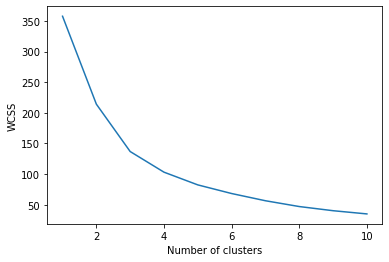

In [12]:
# Elbow method to find right amount of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=400, random_state=0)
    kmeans.fit(embedding_2d)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 10 The average silhouette_score is : 0.3932625
For n_clusters = 11 The average silhouette_score is : 0.42189205
For n_clusters = 12 The average silhouette_score is : 0.41449553
For n_clusters = 13 The average silhouette_score is : 0.4259212
For n_clusters = 14 The average silhouette_score is : 0.45814788
For n_clusters = 15 The average silhouette_score is : 0.46846154
For n_clusters = 16 The average silhouette_score is : 0.46564323
For n_clusters = 17 The average silhouette_score is : 0.46878242
For n_clusters = 18 The average silhouette_score is : 0.4754454
For n_clusters = 19 The average silhouette_score is : 0.4849391
For n_clusters = 20 The average silhouette_score is : 0.49933386
For n_clusters = 21 The average silhouette_score is : 0.49268413
For n_clusters = 22 The average silhouette_score is : 0.4984397
For n_clusters = 23 The average silhouette_score is : 0.5165183
For n_clusters = 24 The average silhouette_score is : 0.52123225
For n_clusters = 25 The average

c:\users\roos\tf\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 30 The average silhouette_score is : 0.5372567
For n_clusters = 31 The average silhouette_score is : 0.5404828
For n_clusters = 32 The average silhouette_score is : 0.5396992
For n_clusters = 33 The average silhouette_score is : 0.5412131
For n_clusters = 34 The average silhouette_score is : 0.5422944
For n_clusters = 35 The average silhouette_score is : 0.54071784
For n_clusters = 36 The average silhouette_score is : 0.5287148
For n_clusters = 37 The average silhouette_score is : 0.5447211
For n_clusters = 38 The average silhouette_score is : 0.53479815
For n_clusters = 39 The average silhouette_score is : 0.53261656


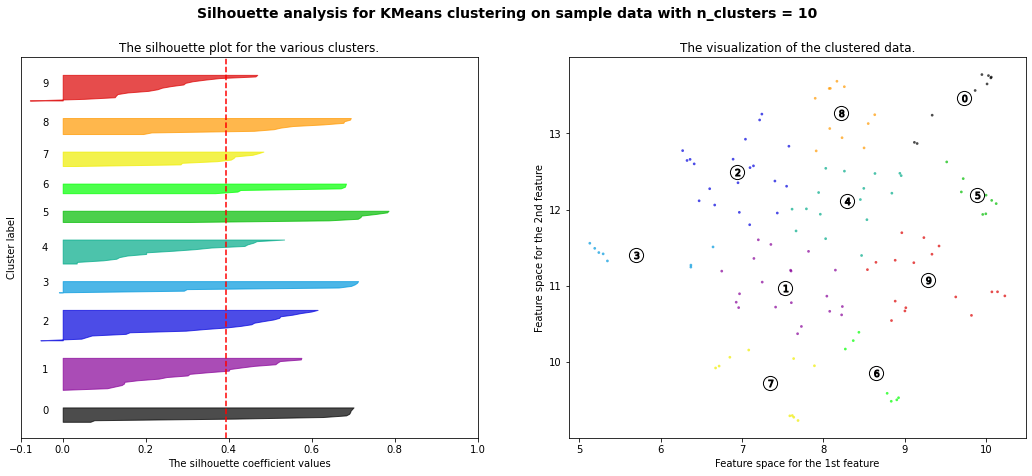

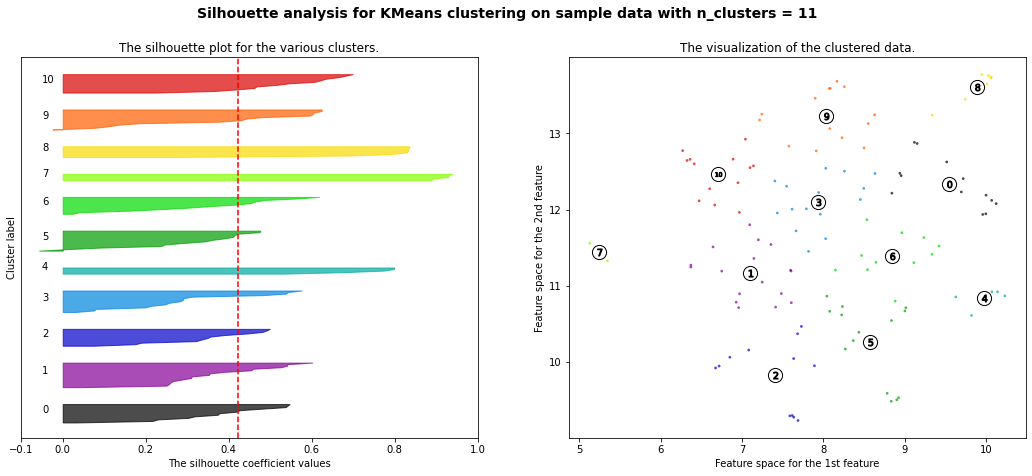

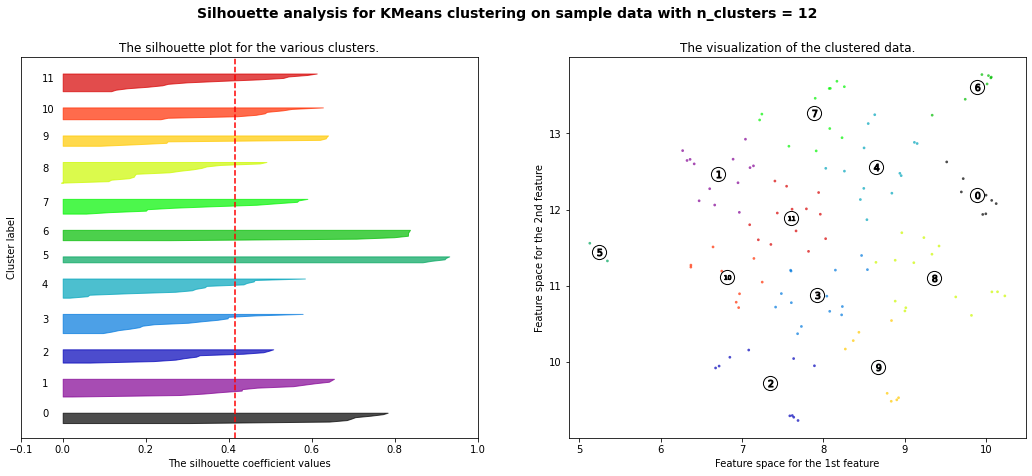

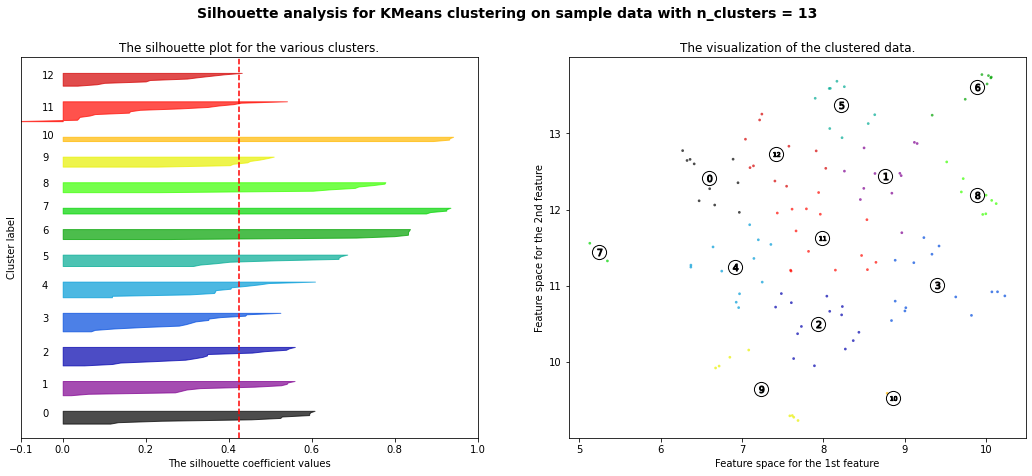

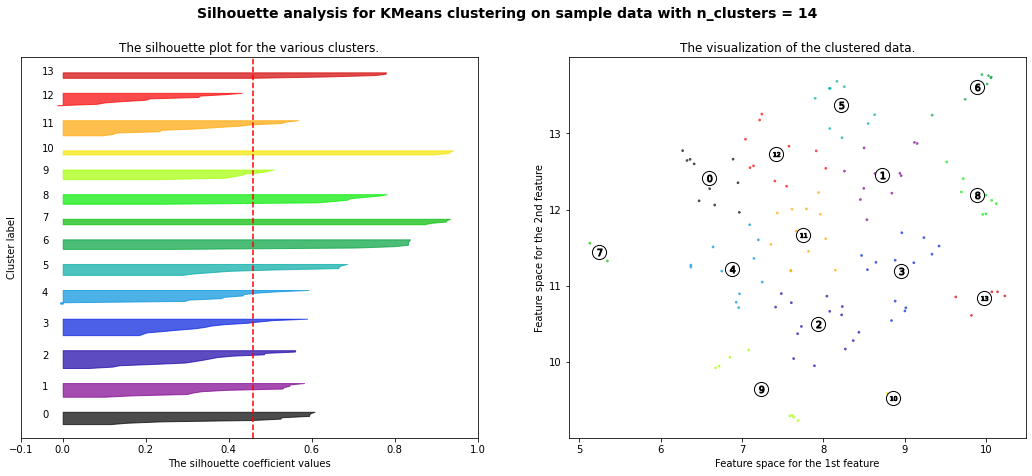

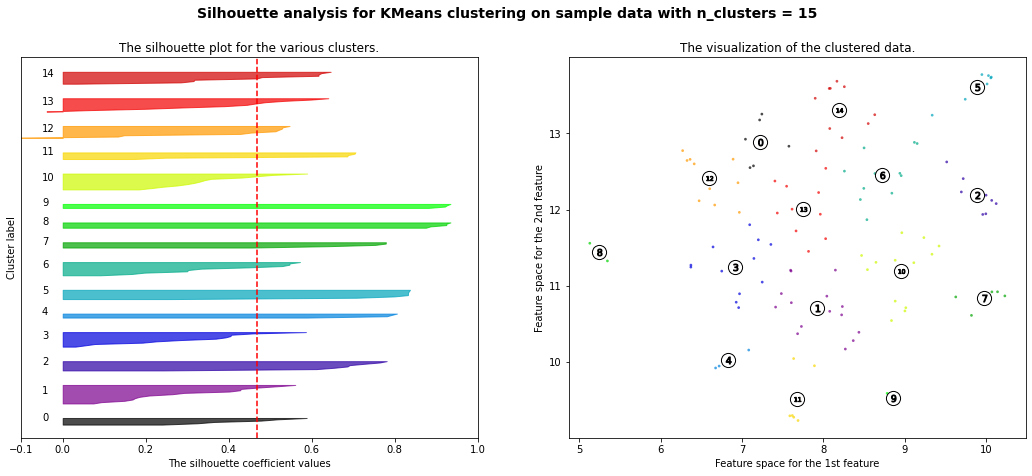

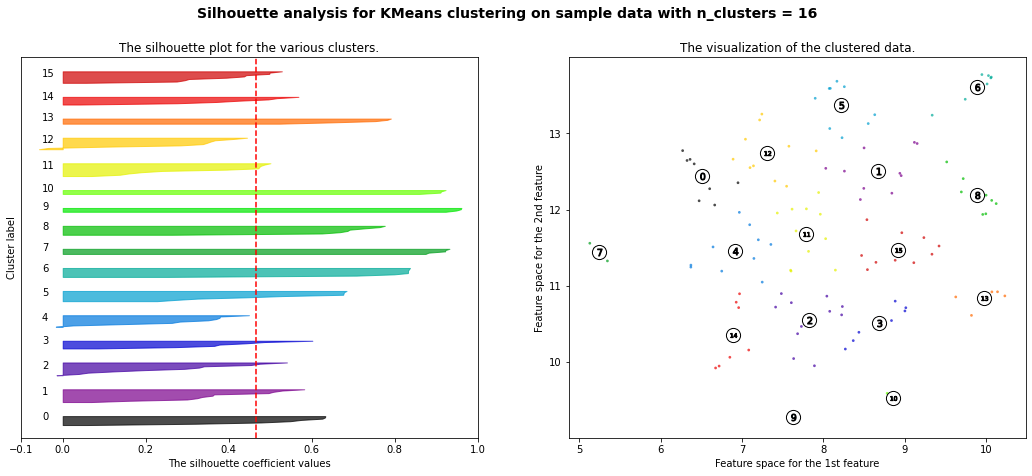

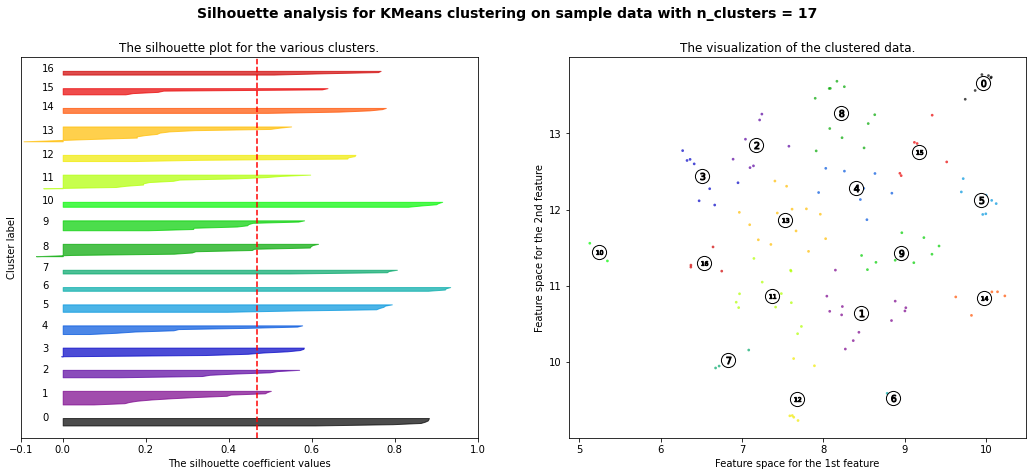

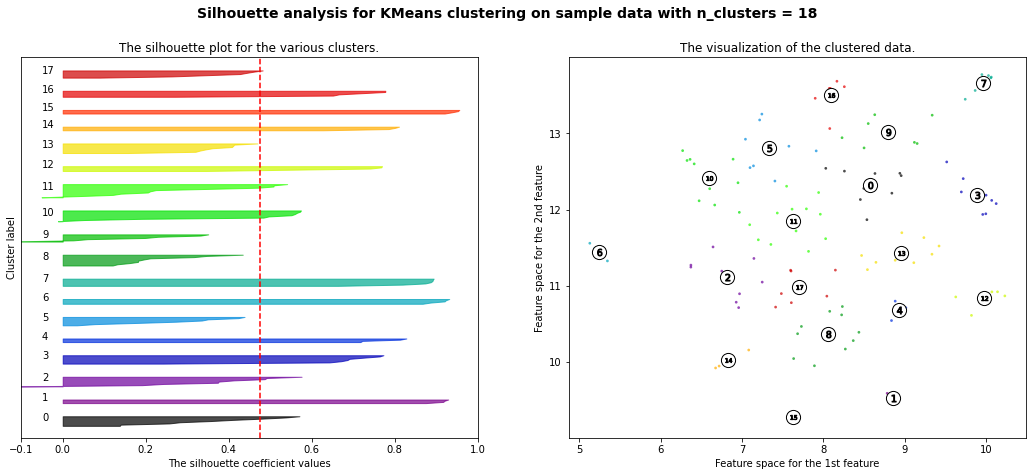

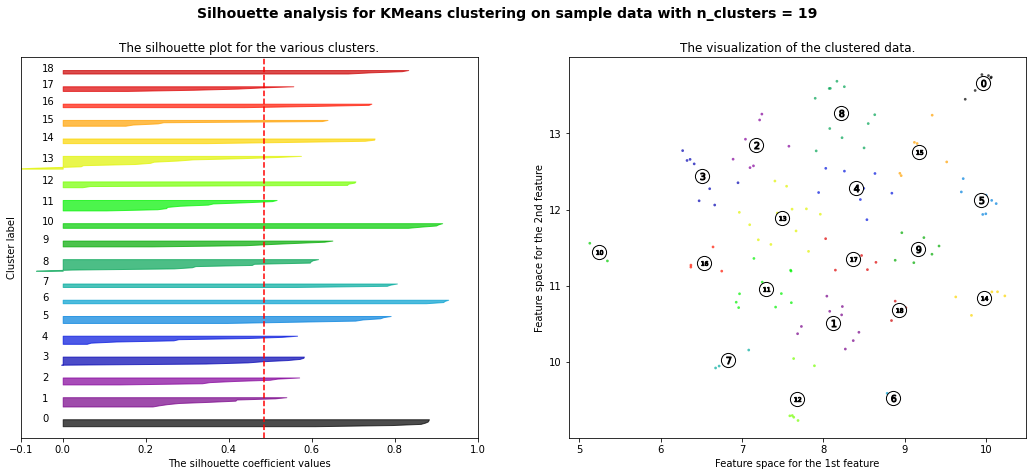

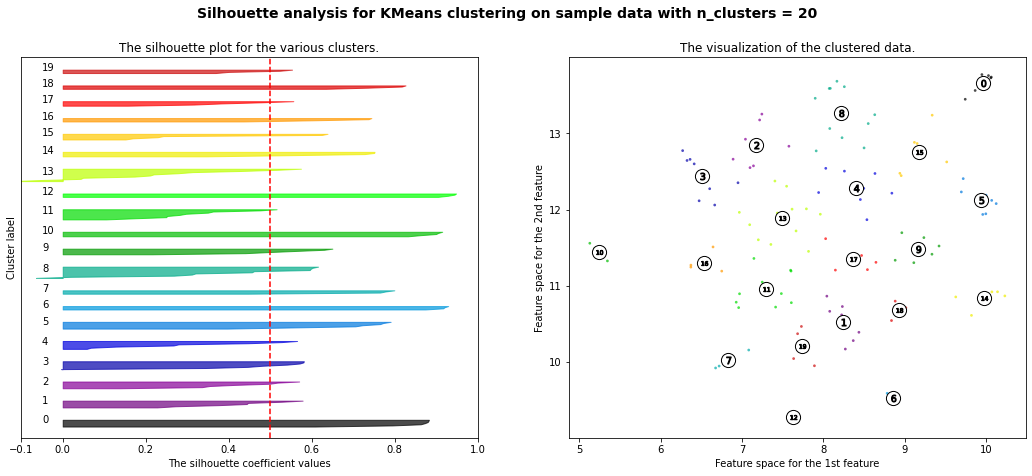

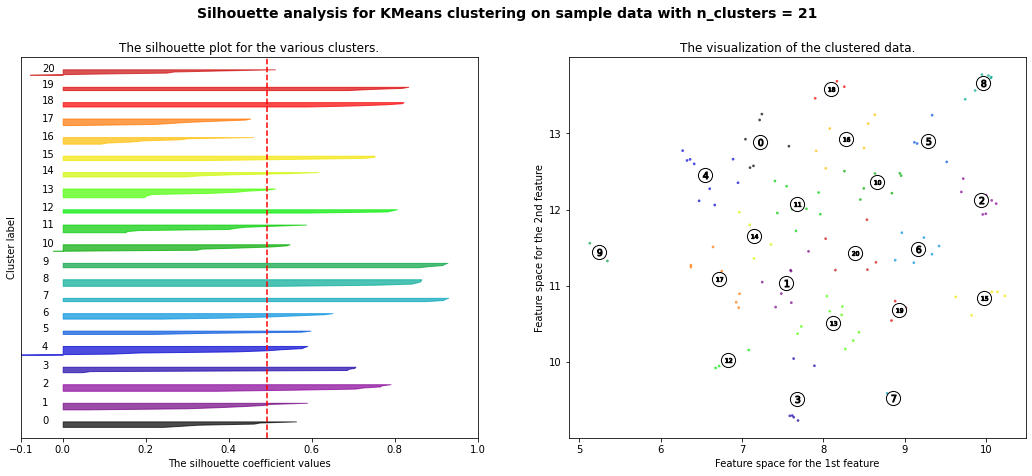

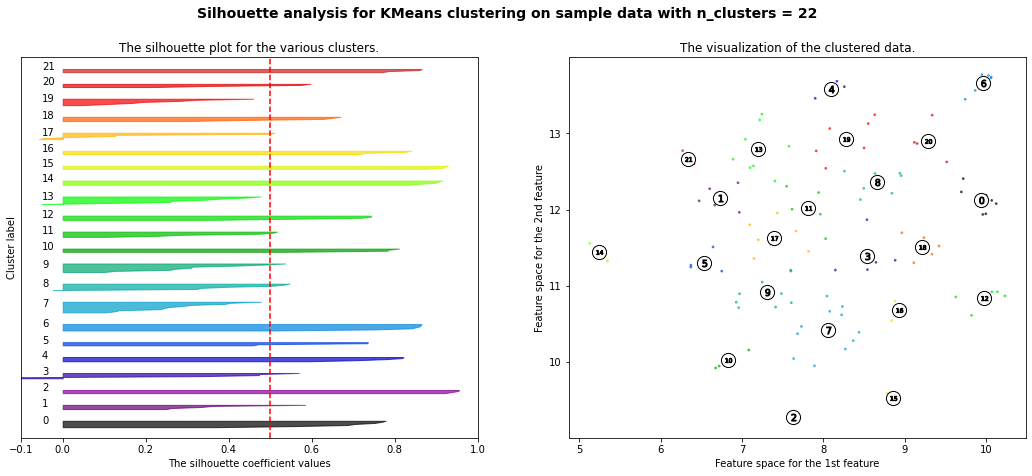

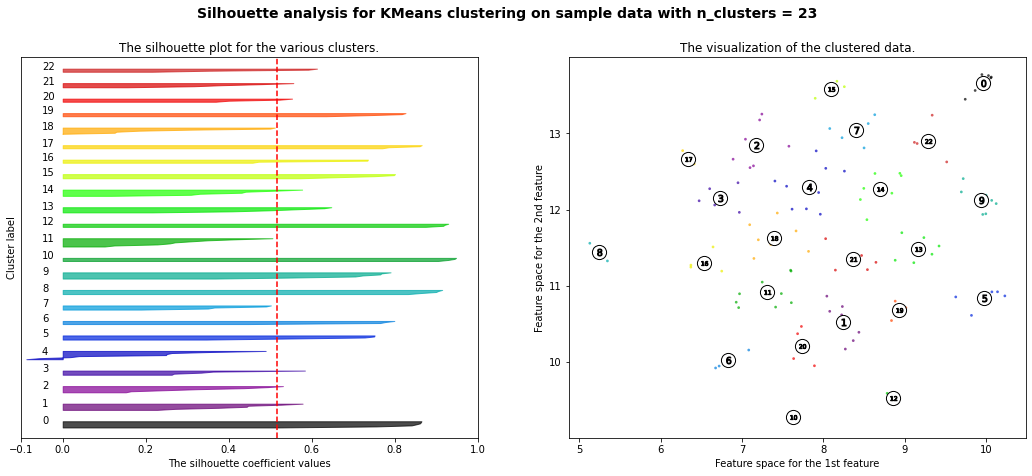

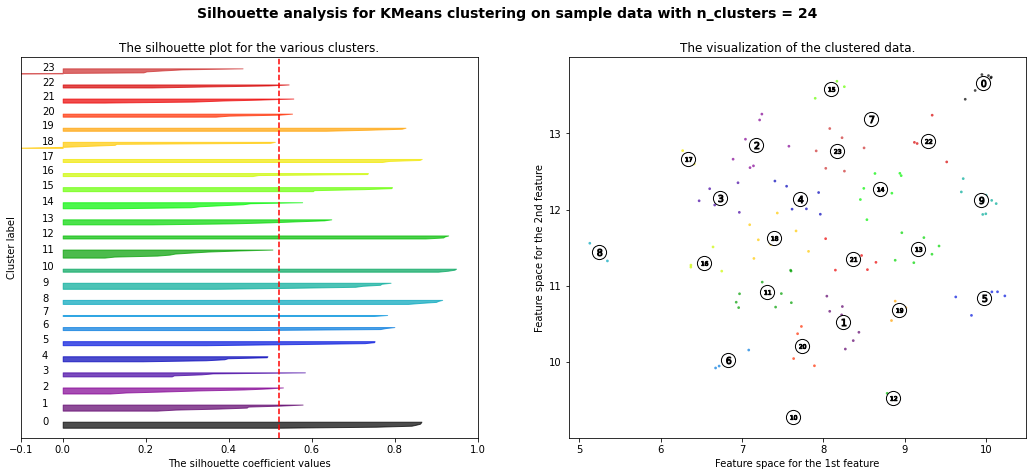

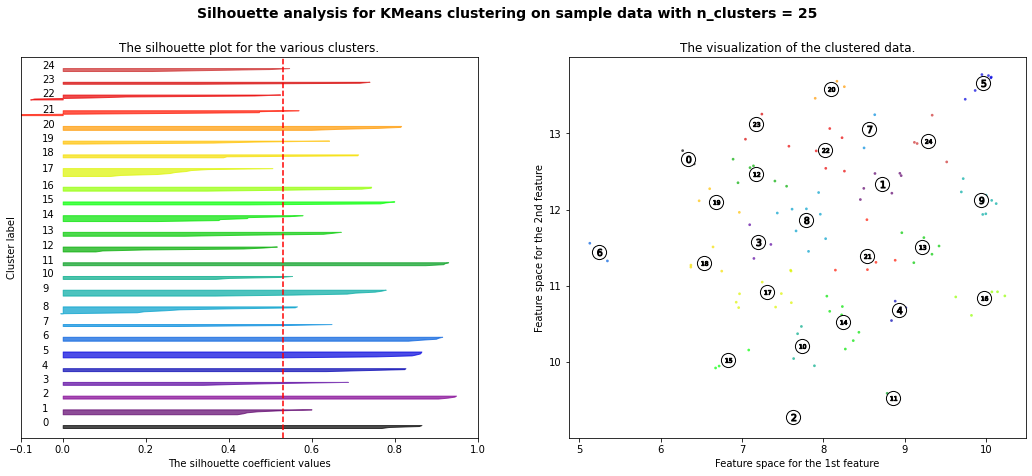

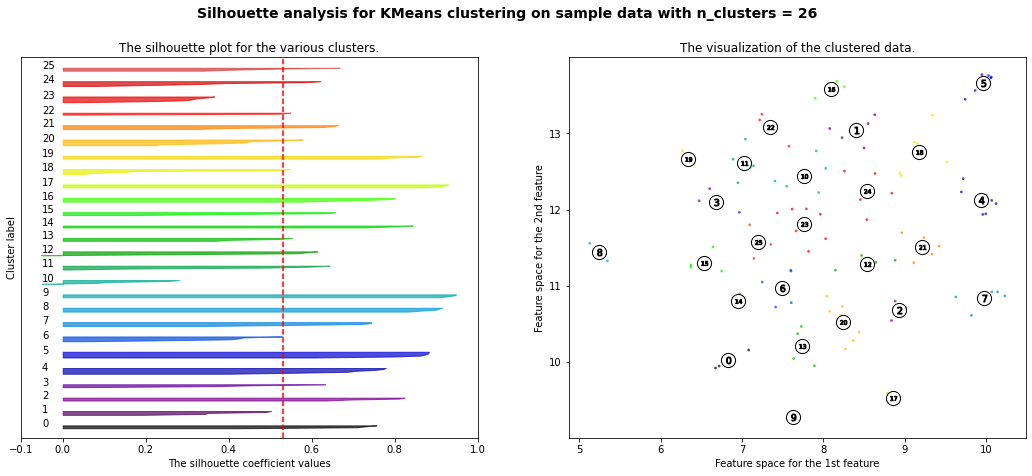

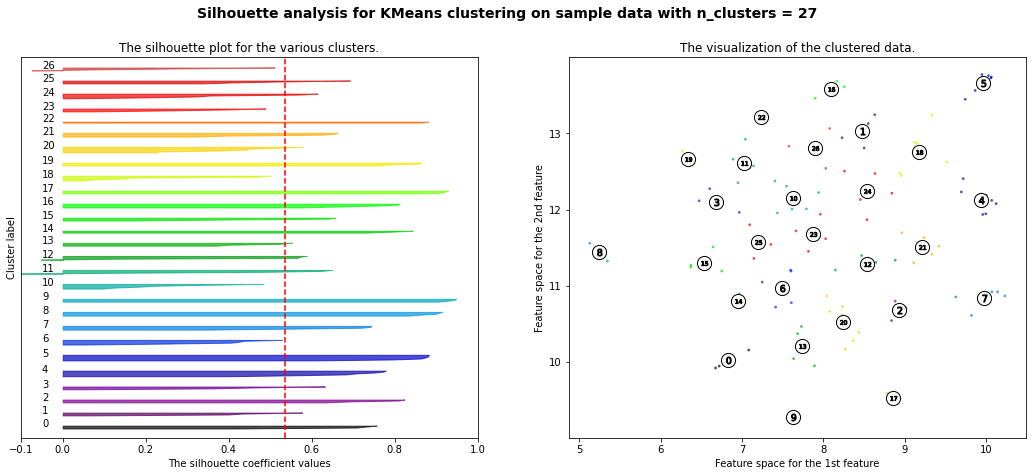

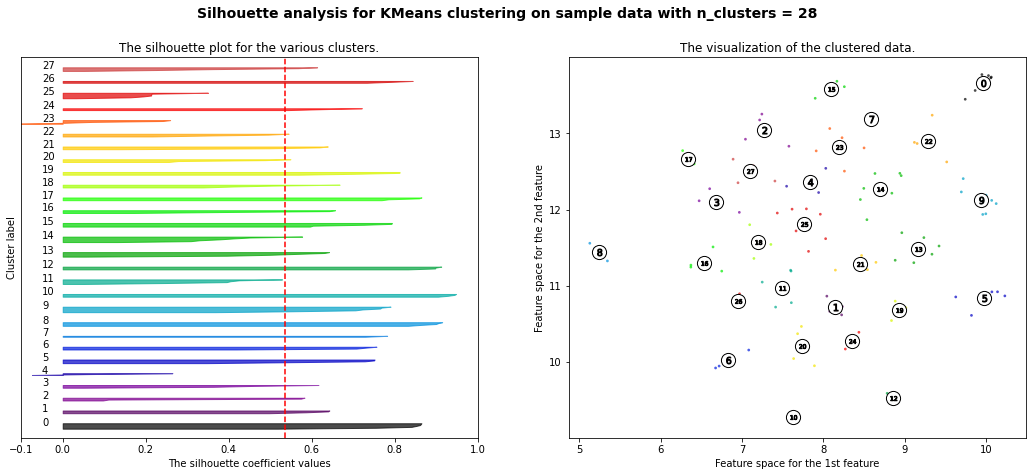

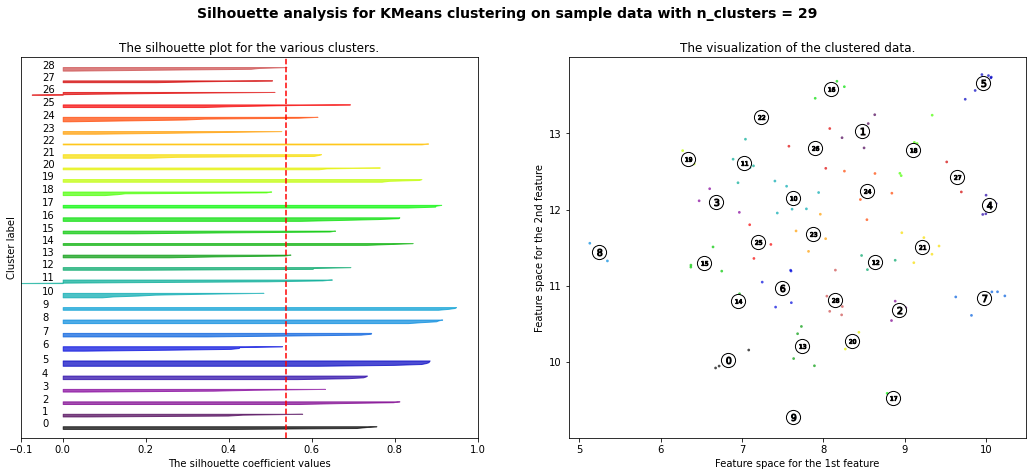

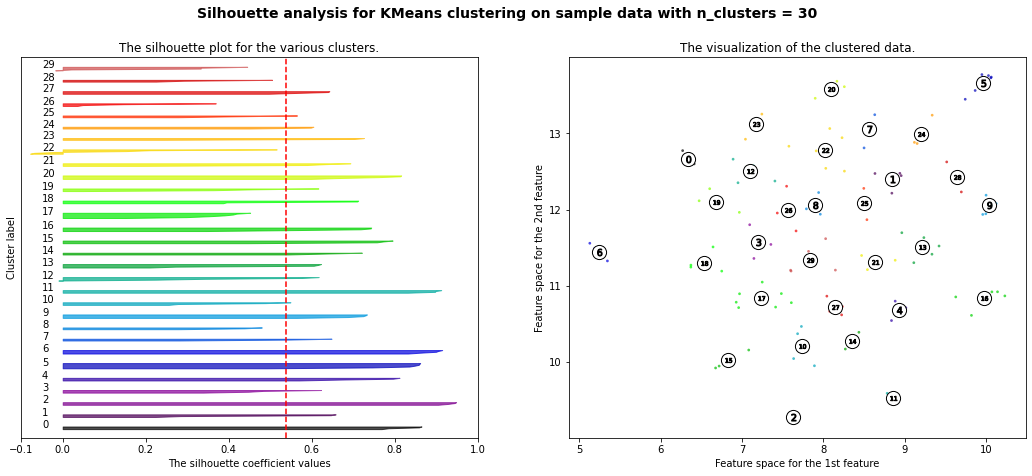

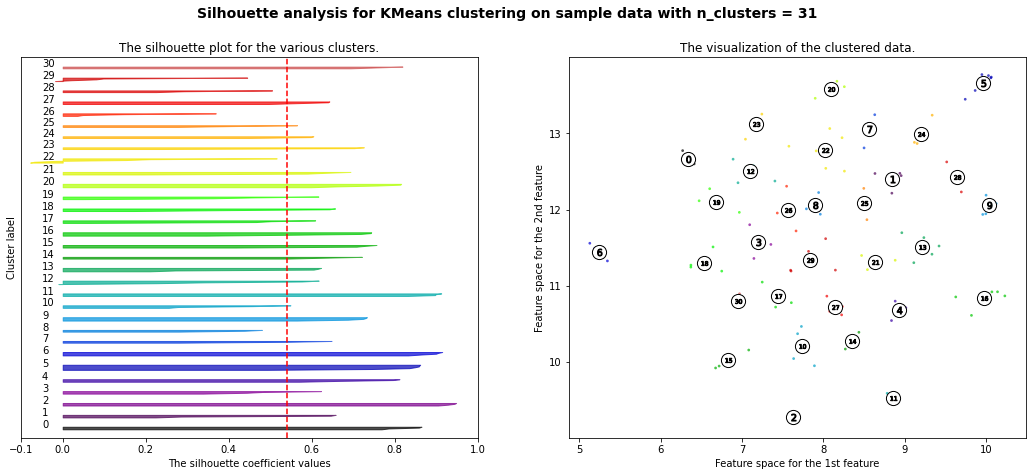

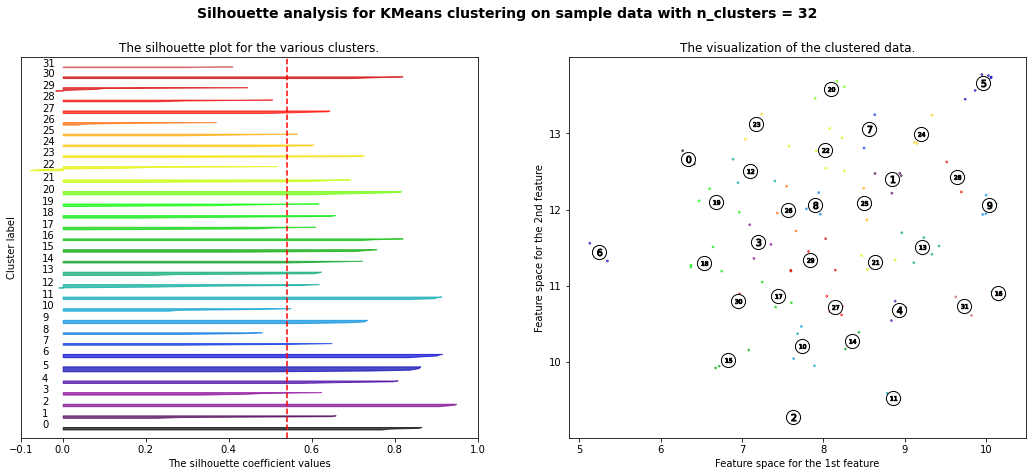

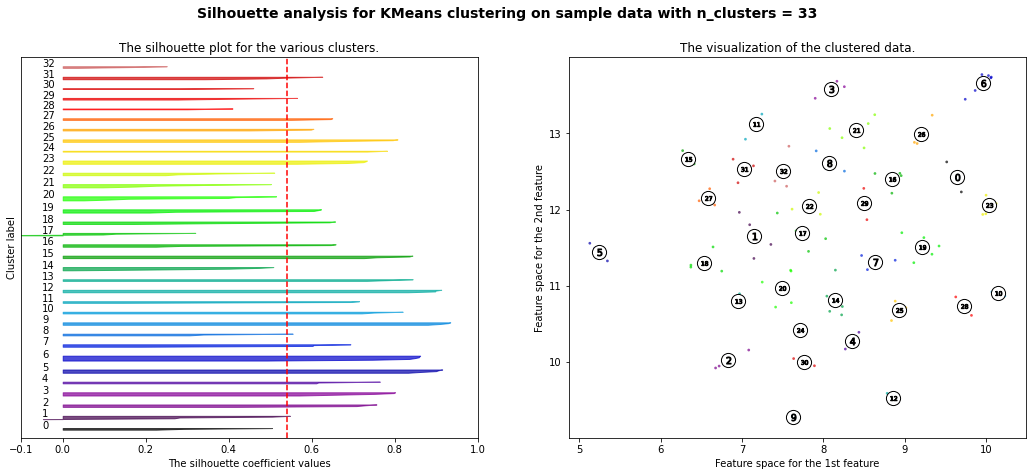

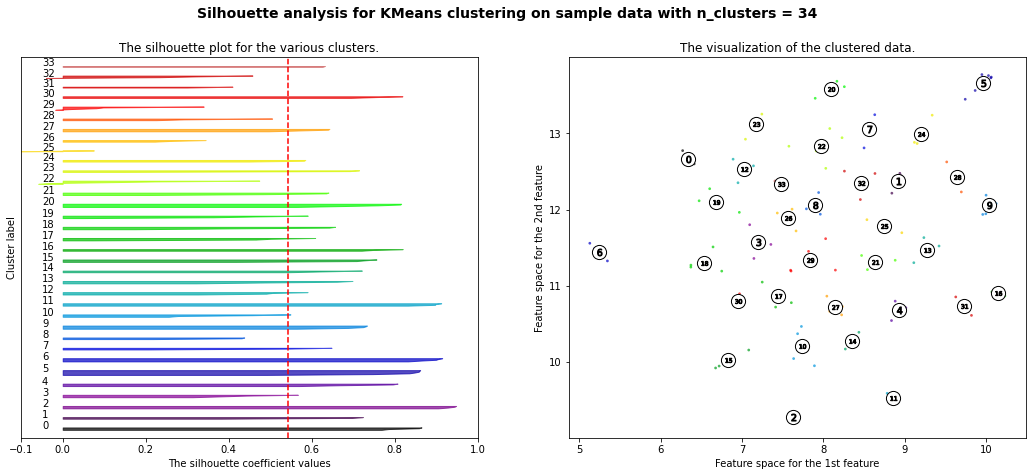

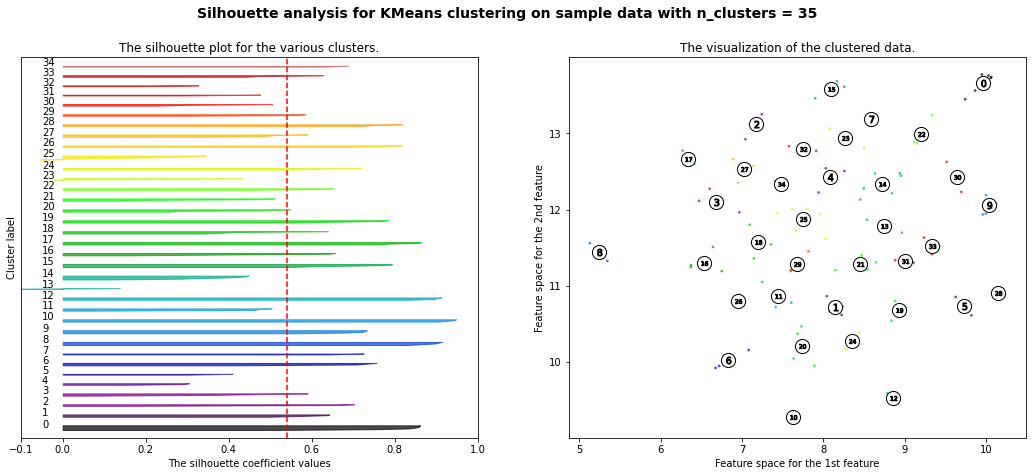

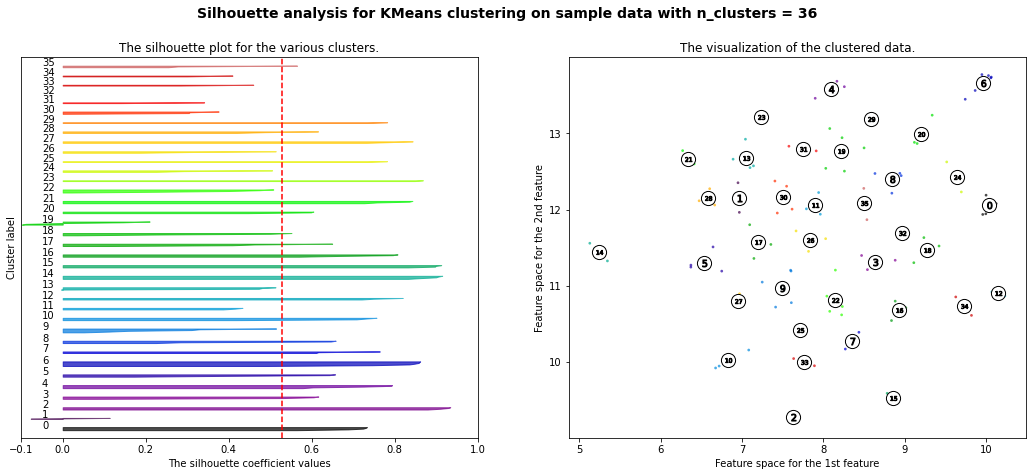

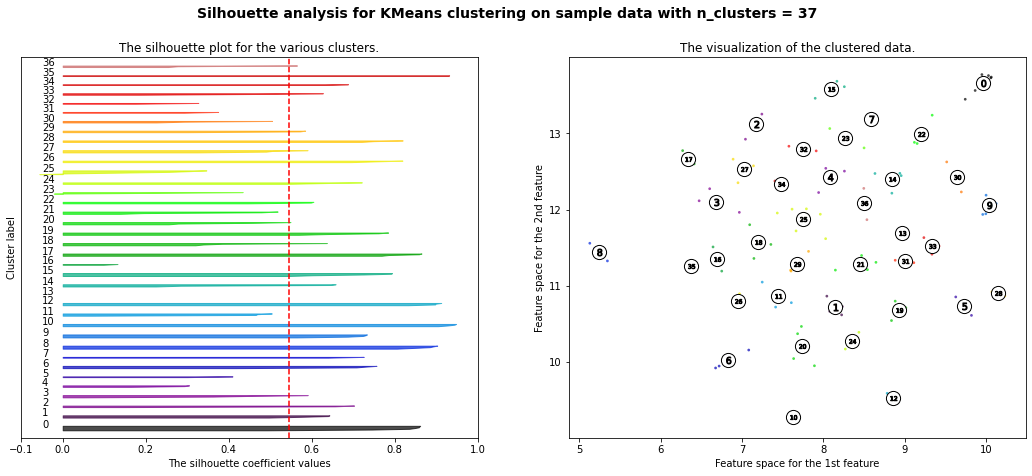

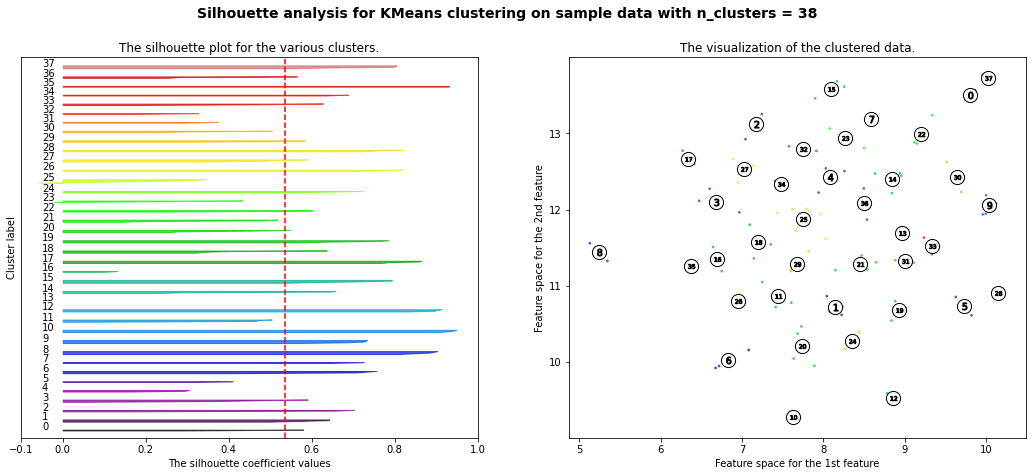

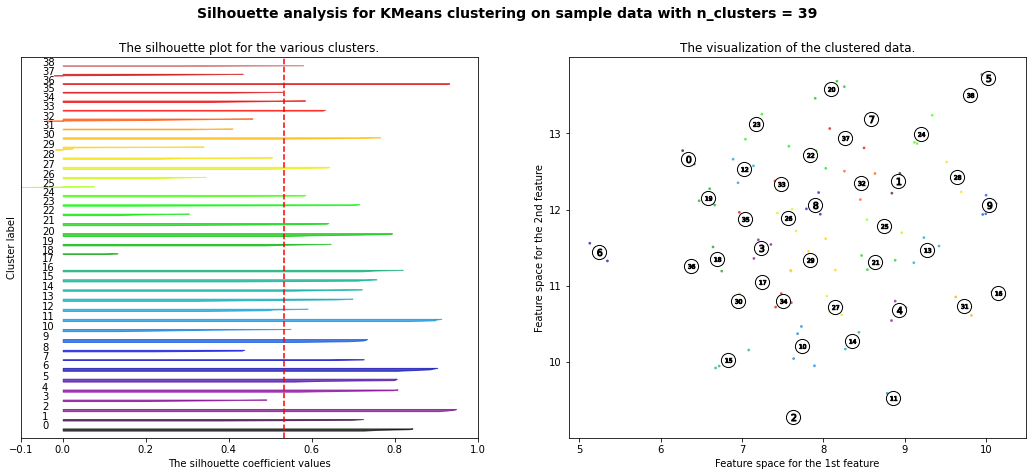

In [14]:
#  Silhouette Analysis 

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = embedding_2d

range_n_clusters = range(10, 40) 

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=23)
kmeans.fit(embedding_2d)
y_kmeans = kmeans.predict(embedding_2d)

In [16]:
#  Cluster embeddings 

clustering_algorithm = KMeans(n_clusters=23, n_init=128, max_iter=500, random_state=0)
clusters = find_clusters(unique_vars, model, clustering_algorithm, mode='entity')

In [17]:
df = pd.DataFrame({"variables": unique_vars, 
                   "clusters": "cluster" + pd.Series(clusters).astype(str),
                   "embedding1": embedding_2d[:, 0],
                   "embedding2": embedding_2d[:, 1]})

plot_df = prefix_abbreviation(df)

In [18]:
pd.set_option('max_rows', 300)
plot_df

,variables,clusters,embedding1,embedding2
0,academicDiscipline,cluster6,6.674539,9.924035
1,academicGradeLevel,cluster6,6.849960,10.064298
2,academicGrade,cluster6,7.081919,10.158986
3,ageCohort,cluster10,9.515152,12.623774
4,anchor,cluster10,6.966415,11.963197
5,anonymityManipul,cluster8,8.901441,9.506248
6,blockOfCooperation,cluster17,7.243438,13.250728
7,cognitiveLoadTreatment,cluster16,7.911054,12.768295
8,communicationContent,cluster15,8.165944,13.681053
9,communicationOccurrence,cluster15,8.071068,13.586336


500

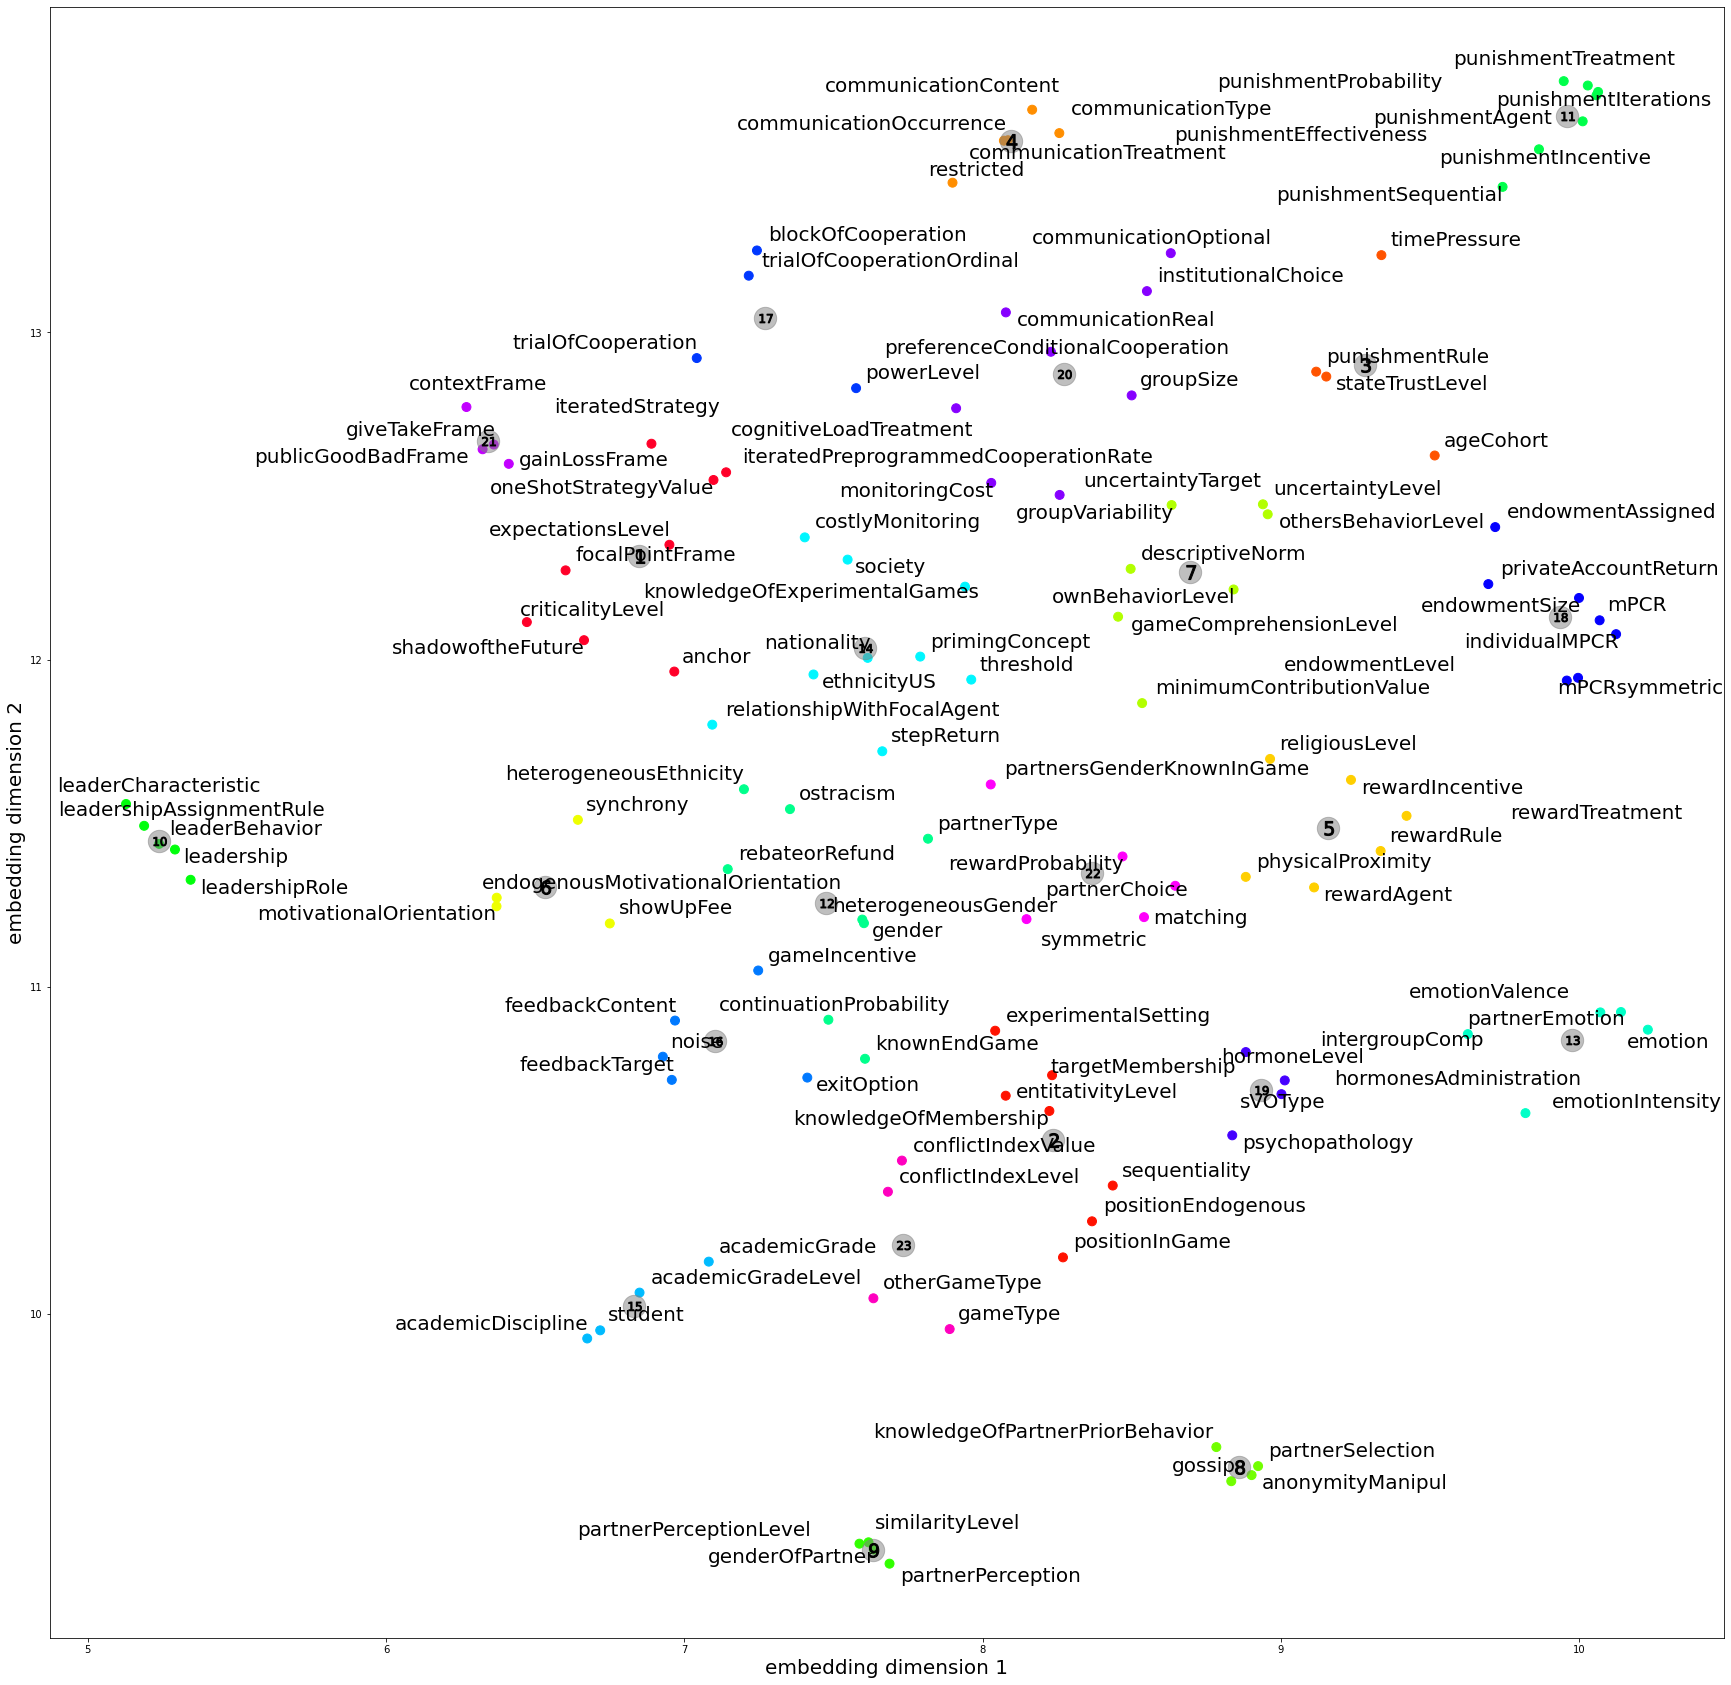

In [19]:
#  Create figure 

X = embedding_2d
centers = kmeans.cluster_centers_

plt.figure(figsize=(30, 30))
texts = []

for i, point in plot_df.iterrows():
    texts.append(plt.text(point['embedding1']+0.02,
                 point['embedding2']+0.01,
                 str(point["variables"]), fontsize = 20))
ax = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=80, cmap='gist_rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=500, alpha=0.5, marker='o');

for i, c in enumerate(centers):
    r = i+1
    plt.scatter(c[0], c[1], marker='$%d$' % r, c='black', alpha=1, s=200, edgecolor='k')

plt.xlabel('embedding dimension 1', fontsize=20)
plt.ylabel('embedding dimension 2', fontsize=20)
adjust_text(texts)